In [1]:
pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

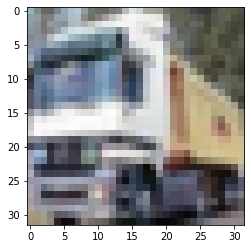

In [4]:
plt.imshow(X_train[1])

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
X_train_scaled = X_train / 255
X_test_scaled = X_test/ 255

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [8]:
num_classes = 10


cnn = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])






  

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)             

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [13]:
cnn.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 99s 58ms/step - loss: 2.0001 - accuracy: 0.3419 - val_loss: 1.5369 - val_accuracy: 0.4386
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.5202 - accuracy: 0.4491 - val_loss: 1.4841 - val_accuracy: 0.4771
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4298 - accuracy: 0.4853 - val_loss: 1.3229 - val_accuracy: 0.5271
Epoch 4/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.3626 - accuracy: 0.5171 - val_loss: 1.3321 - val_accuracy: 0.5324
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.3103 - accuracy: 0.5383 - val_loss: 1.2704 - val_accuracy: 0.5544
Epoch 6/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.2706 - accuracy: 0.5539 - val_loss: 1.2111 - val_accuracy: 0.5797
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.2441 - accuracy: 0.5642 - val_loss: 1.2174 -

In [14]:
import pandas as pd
metrics = pd.DataFrame(cnn.history.history)

In [15]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,2.000087,0.34188,1.536874,0.4386
1,1.520196,0.44914,1.484122,0.4771
2,1.429808,0.48534,1.322943,0.5271
3,1.362607,0.51712,1.332110,0.5324
4,1.310307,0.53830,1.270380,0.5544
5,1.270609,0.55392,1.211120,0.5797
6,1.244120,0.56418,1.217353,0.5934
7,1.211640,0.57816,1.272255,0.5602


<AxesSubplot:>

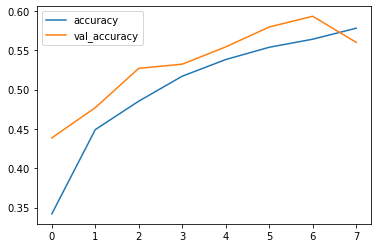

In [16]:
metrics[["accuracy", "val_accuracy"]].plot()

<AxesSubplot:>

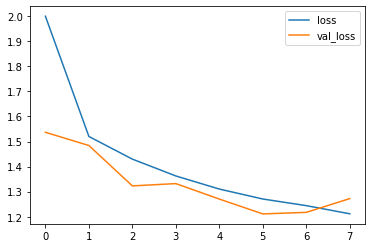

In [17]:
metrics[["loss", "val_loss"]].plot()

In [18]:
cnn.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 4s 11ms/step - loss: 1.2723 - accuracy: 0.5602


[1.2722554206848145, 0.5601999759674072]

In [19]:
result=cnn.predict(X_test)
res=np.argmax(result,axis=1)
res

313/313 [==============================] - 3s 10ms/step


array([3, 1, 1, ..., 5, 4, 7], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(res,y_test)

0.5602